# Diskretna kosinusna transformacija
&nbsp;

***Diskretna kosinusna transformacija*** data je formulom:

$$X_k=\sum_{n=0}^{N−1}x_n\cos\left[\frac{\pi}{N}(n+\frac{1}{2})k\right] \quad \quad k = 0,\dots ,N−1 $$

S obzirom da su bazne funkcije realne kosinusne funkcije, signali koje kompresujemo moraju takođe biti realni. 

Transformacija DKT-om daje manje koeficijente kad se koristi na prirodnim slikama i zvukovima što je čini najboljom metodom u raznim primenama, uključujući i *JPEG* kompresiju slika i *lossy* kompresiju zvukova.

&nbsp;

***Inverzna diskretna kosinusna transformacija*** je data formulom:

$$X_k = \frac{1}{2}x_0 + \sum _{n=1}^{N-1}x_n \cos\left[\frac{\pi}{N}n(k+\frac{1}{2})\right] \quad \quad k=0,\dots ,N-1 $$

&nbsp;

***Diskretna kosinusna transformacija u dve dimenzije*** data je formulom po vrstama i kolonama matrice:

$$X_{k1,k2}=\sum_{n_1=0}^{N_1−1}\sum_{n_2=0}^{N_2−1}x_{n_1,n_2}\cos\left[\frac{\pi}{N_1}(n_1+\frac{1}{2})k_1\right]\cos\left[\frac{\pi}{N_2}(n_2+\frac{1}{2})k_2\right]$$

In [72]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from PIL import Image

from scipy.fftpack import dct, idct


In [57]:
def discrete_cosine_transformation(X):
    M = X.shape[0]
    N = X.shape[1]
    a = np.empty(X.shape)
    b = np.empty(X.shape)

    for i in range(M):
        a[i,:] = dct(X[i,:], type=2)
    for j in range(N):
        b[:,j] = dct(a[:,j], type=2)
    
    return b

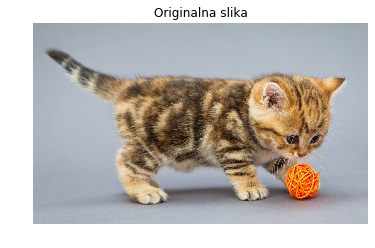

In [48]:
img = np.array(Image.open('slika.jpg'))
plt.imshow(img)
plt.axis('off')
plt.title('Originalna slika')
plt.show()

In [49]:
img.shape

(582, 970, 3)

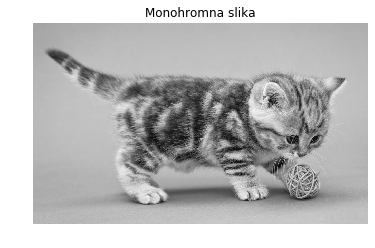

In [50]:
img = np.array(Image.open('slika.jpg').convert('L'))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Monohromna slika')
plt.show()

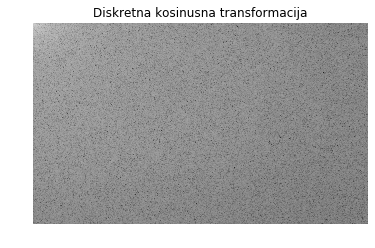

In [63]:
c = discrete_cosine_transformation(img)
plt.imshow(np.log(np.abs(c)), cmap='gray')
plt.title('Diskretna kosinusna transformacija')
plt.axis('off')
plt.show()

In [60]:
from numpy import fft

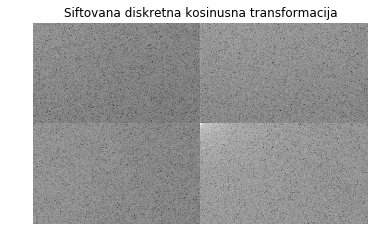

In [128]:
c_shifted = fft.fftshift(c)
plt.imshow(np.log(np.abs(c_shifted)), cmap='gray')
plt.title('Siftovana diskretna kosinusna transformacija')
plt.axis('off')
plt.show()

In [84]:
def inverse_discrete_cosine_transformation(X):
    M = X.shape[0]
    N = X.shape[1]
    a = np.empty(X.shape)
    b = np.empty(X.shape)

    for i in range(M):
        a[i,:] = idct(X[i,:], type=2)
    for j in range(N):
        b[:,j] = idct(a[:,j], type=2)
    
    return b

In [137]:
mask = np.zeros(img.shape)
x_center = img.shape[0] // 2
y_center = img.shape[1] // 2
nb_ones = 50
mask[x_center-nb_ones : x_center+nb_ones, y_center-nb_ones : y_center+nb_ones] = 1

In [138]:
c_shifted_filtered = c_shifted * mask
# funkcija inverzna funkciji fftshift
c_filtered = fft.ifftshift(c_shifted_filtered)
c_final = inverse_discrete_cosine_transformation(c_filtered)

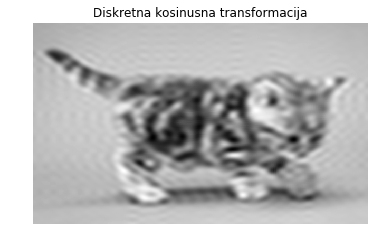

In [141]:
plt.imshow(np.abs(c_final), cmap='gray')
plt.title('Diskretna kosinusna transformacija')
plt.axis('off')
plt.show()

In [142]:
blured_image = Image.fromarray(np.abs(c_final))
blured_image.convert('L').save('slika_out1.jpg')

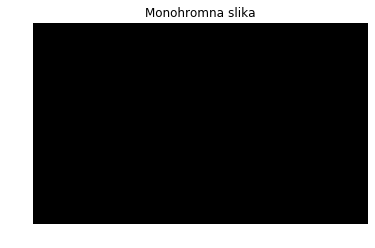

In [143]:
img = np.array(Image.open('slika_out1.jpg').convert('L'))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Monohromna slika')
plt.show()